In [1]:
import pandas as pd

### <span style="color:blue"> 1.Create a Datatime index containing all the weekdays days of year 2019 and assign a random number to each of them in a dataframe.</span>

In [2]:
# help( pd.date_range)

In [3]:
dates = pd.date_range(start='01-01-2019',end='31-12-2019')
dates                      

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [4]:
df = pd.DataFrame(dates)
df['number'] = np.random.rand(df.shape[0])

In [5]:
df

,0,number
0,2019-01-01,0.275221
1,2019-01-02,0.459764
2,2019-01-03,0.789576
3,2019-01-04,0.778888
4,2019-01-05,0.607081
...,...,...
360,2019-12-27,0.042693
361,2019-12-28,0.962397
362,2019-12-29,0.077474
363,2019-12-30,0.684680


### <span style="color:blue"> 2. Given Pandas series , height = [23,42,55] and weight = [71,32,48] . Create a dataframe with height and weight as column names. </span>

In [6]:
dict={'height':[23,42,55],'weight':[71,32,48]}

In [7]:
data = pd.DataFrame(dict)
data

,height,weight
0,23,71
1,42,32
2,55,48


#####  Alternate approach

In [8]:
height = [23,42,55]
weight = [71,32,48]
df = pd.DataFrame()
df['height'] = height
df['weight'] = weight
df

,height,weight
0,23,71
1,42,32
2,55,48


### <span style="color:blue">3.How to get the items of series A not present in series B .From ser1 remove items present in ser2 </span>

In [9]:
ser1 = pd.Series([2,3,4,5])
ser2 = pd.Series([5,6,7,8])
result = set(ser1.values)-set(ser2.values)
result

{2, 3, 4}

###  <span style="color:blue"> Questions on Titanic Dataset :- </span>

In [10]:
titanic = pd.read_csv(r'E:\SupervisedLearning\datasets\titanic.csv')

In [11]:
titanic_original = titanic.copy()

### <span style="color:blue">4. Compute the minimum, 25th percentile, median, 75th, and maximum of age in titanic dataset
</span>

In [12]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### <span style="color:blue"> 5. How to get frequency counts of unique items of a series? Calculate the frequency counts of ‘SibSp’ column in titanic Dataset </span>

In [13]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
sns.countplot(titanic['SibSp'])
plt.show()

<Figure size 640x480 with 1 Axes>

### <span style="color:blue"> 6. Keep only top 2 most frequent values as it is and replace everything else as ‘Other’ in ‘Embarked’ column of titanic dataset </span>

In [15]:
titanic['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [16]:
dic = {'S':'S','C':'C','Q':'Other'}

In [17]:
titanic['Embarked'] = titanic['Embarked'].map(dic)

In [18]:
titanic['Embarked'].value_counts()

S        644
C        168
Other     77
Name: Embarked, dtype: int64

##### Alternate approach

In [19]:
# This approach will calculate for null values as well
titanic = titanic_original.copy()

titanic['Embarked'] = titanic['Embarked'].map(lambda x : x if x in(['S','C']) else 'Other')

In [20]:
titanic['Embarked'].value_counts()

S        644
C        168
Other     79
Name: Embarked, dtype: int64

#### Another approach

In [21]:
titanic = titanic_original.copy()
top_2 = list(titanic['Embarked'].value_counts().nlargest(2).index)
titanic['Embarked'] = titanic['Embarked'].map(lambda x : x if x in(top_2) else 'Other')

In [22]:
titanic['Embarked'].value_counts()

S        644
C        168
Other     79
Name: Embarked, dtype: int64

### <span style="color:blue"> 7.  Bin the price column in titanic data set into 5 equal groups and get counts of each bin </span>

In [23]:
titanic = titanic_original.copy()
titanic['AgeBins'] = pd.qcut(titanic['Age'],5)
titanic['AgeBins'].value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: AgeBins, dtype: int64

### <span style="color:blue"> 8. Count the number of missing values in each column? </span>

In [24]:
titanic = titanic_original.copy()
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <span style="color:blue"> 9. Get the row number of the 5th largest value in the Age column of titanic dataset? </span>

In [25]:
titanic = titanic_original.copy()
index = titanic['Age'].sort_values(ascending=False).index[4]
print(f"Row number of the 5th largest value in the Age column of titanic dataset is {index}")

Row number of the 5th largest value in the Age column of titanic dataset is 116


### Alternate approach

In [26]:
titanic['Age'].nlargest(5).index[-1]

116

### <span style="color:blue"> 10 Normalize all columns in a dataframe?

In [27]:
def normalize(x):
    return (x - np.mean(x))/np.std(x)

In [28]:
titanic.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object>

In [29]:
titanic_num_columns = titanic.select_dtypes(exclude='O').columns

In [30]:
titanic[titanic_num_columns]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [31]:
titanic_normalized = titanic[titanic_num_columns].apply(lambda x: normalize(x))

In [32]:
# titanic_normalized['Age'].isnull().sum()

In [33]:
titanic_normalized.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age             True
SibSp          False
Parch          False
Fare           False
dtype: bool

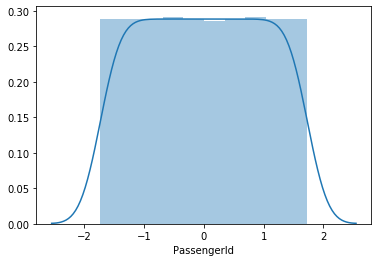

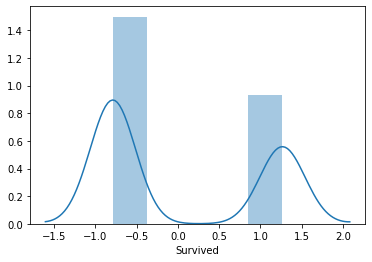

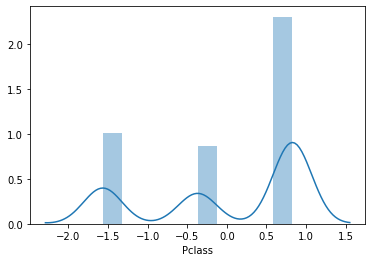

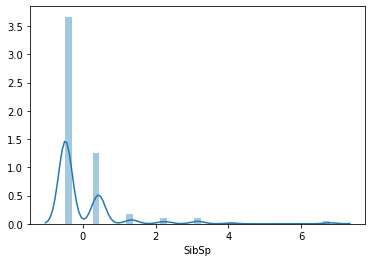

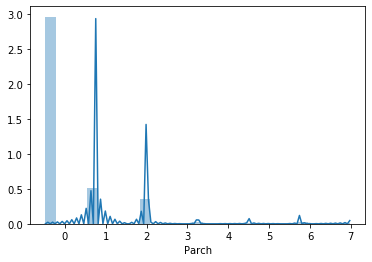

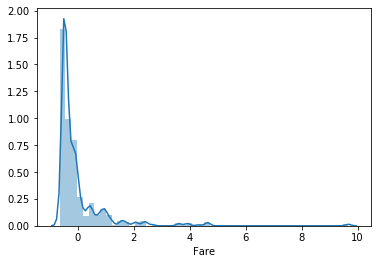

In [34]:
for col in list(titanic_normalized.columns):
    if col not in ['Age']:
        sns.distplot(titanic_normalized[col])
        plt.show()

### 11. Get the indices of items of ser2 in ser1 as a list.

In [37]:
ser1 = pd.Series([10,9,6,5,3,1,12,8,1,13])
ser2 = pd.Series([1,3,10,13])

[idx for idx,value in enumerate(ser1) if value in ser2]

[4, 5, 8]

### 12. How to convert a series of date-strings to a timeseries?

data: ['01 Jan 2020','02-02-2011','20120303','2013/04/04','2014-05-05','2015-06-06T12:20']

In [57]:
data = ['21 Jan 2020','02-02-2011','20120303','2013/04/04','2014-05-05','2015-06-06T12:20']
dt = pd.to_datetime(data)
dt

DatetimeIndex(['2020-01-21 00:00:00', '2011-02-02 00:00:00',
               '2012-03-03 00:00:00', '2013-04-04 00:00:00',
               '2014-05-05 00:00:00', '2015-06-06 12:20:00'],
              dtype='datetime64[ns]', freq=None)

In [59]:
ser = pd.Series(data)
ser = ser.apply(lambda x: pd.to_datetime(x))
ser

0   2020-01-21 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

### 13. Get the day of month, week number, day of year and day of week from ser.

In [67]:
df = pd.DataFrame(ser)
df

,0
0,2020-01-21 00:00:00
1,2011-02-02 00:00:00
2,2012-03-03 00:00:00
3,2013-04-04 00:00:00
4,2014-05-05 00:00:00
5,2015-06-06 12:20:00


In [70]:
df['day_of_month'] = df[0].apply(lambda x:x.day)
df['week_number'] = df[0].apply(lambda x:x.week)
df['day_of_year'] = df[0].apply(lambda x:x.dayofyear)
df['day_of_week'] = df[0].apply(lambda x:x.dayofweek)

In [71]:
df

,0,day_of_month,week_number,day_of_year,day_of_week
0,2020-01-21 00:00:00,21,4,21,1
1,2011-02-02 00:00:00,2,5,33,2
2,2012-03-03 00:00:00,3,9,63,5
3,2013-04-04 00:00:00,4,14,94,3
4,2014-05-05 00:00:00,5,19,125,0
5,2015-06-06 12:20:00,6,23,157,5


### 14. Compute the euclidean distance between series (points) p and q, without using a packaged formula.

In [78]:
p = list(range(1,11,1))
q = list(range(10,0,-1))

In [79]:
print(p)
print(q)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [80]:
from scipy.spatial import distance

In [81]:
distance.euclidean(p,q)

18.16590212458495

### verification

In [85]:
result = [(x-y)**2 for x,y in zip(p,q)]

np.sqrt(np.sum(result))

18.16590212458495

### 15. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays/sundays)

In [101]:
# W-SAT

sats = pd.date_range(start='2000-01-01',periods=5,freq='W-SAT')
sats

DatetimeIndex(['2000-01-01', '2000-01-08', '2000-01-15', '2000-01-22',
               '2000-01-29'],
              dtype='datetime64[ns]', freq='W-SAT')

In [106]:
suns = pd.date_range(start='2000-01-01',periods=5,freq='W-SUN')
suns

DatetimeIndex(['2000-01-02', '2000-01-09', '2000-01-16', '2000-01-23',
               '2000-01-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [111]:
weekends = np.sort(sats.append(suns))

### 16. Import every 50th row of BostonHousing dataset as a dataframe.

In [113]:
boston = pd.read_csv('../../datasets/boston_house_price.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [116]:
idx = [i for i in range(506) if i%50==0]
idx

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [117]:
boston.iloc[idx]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4
